In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score

target: str 
df: pd.DataFrame
clean_dir: Path 

clean_dir = Path("../data/clean")
target = 'Win'

In [2]:
def decision_tree(df: pd.DataFrame):
    X = df.drop(columns=target)
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.10,
        random_state=42,
        stratify=y  
    )

    tree = DecisionTreeClassifier(
        max_depth=4,          # keep shallow for interpretability
        min_samples_leaf=50,  # reduce overfitting
        random_state=42
    )

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    cv_scores = cross_val_score(
        tree,
        X_train,        # no scaling needed for trees
        y_train,
        cv=cv,
        scoring="roc_auc"
    )

    print("Decision Tree CV ROC-AUC scores:", cv_scores)
    print("Mean CV ROC-AUC:", cv_scores.mean())
    print("Std CV ROC-AUC:", cv_scores.std())

    tree.fit(X_train, y_train)

    test_probs = tree.predict_proba(X_test)[:, 1]
    test_auc = roc_auc_score(y_test, test_probs)
    print("Decision Tree Test ROC-AUC:", test_auc)

    feature_importance = pd.Series(
        tree.feature_importances_,
        index=X_train.columns
    ).sort_values(ascending=False)

    print("\nTop 10 most important features:")
    print(feature_importance.head(10))

    plt.figure(figsize=(20, 10))
    plot_tree(
        tree,
        feature_names=X_train.columns,
        class_names=["Loss", "Win"],
        filled=True,
        rounded=True
    )
    plt.title("Decision Tree (max_depth=4)")
    plt.show()


Decision Tree CV ROC-AUC scores: [0.84393829 0.84019429 0.83573331 0.84834847 0.84485468]
Mean CV ROC-AUC: 0.8426138073576398
Std CV ROC-AUC: 0.004309465671370407
Decision Tree Test ROC-AUC: 0.8281400080198196

Top 10 most important features:
TurretDmgDealt>1    0.784449
deaths              0.137690
assists             0.033992
kills               0.022691
MinionsKilled       0.010429
DmgTaken            0.007380
TotalGold           0.003367
DmgDealt            0.000000
dtype: float64


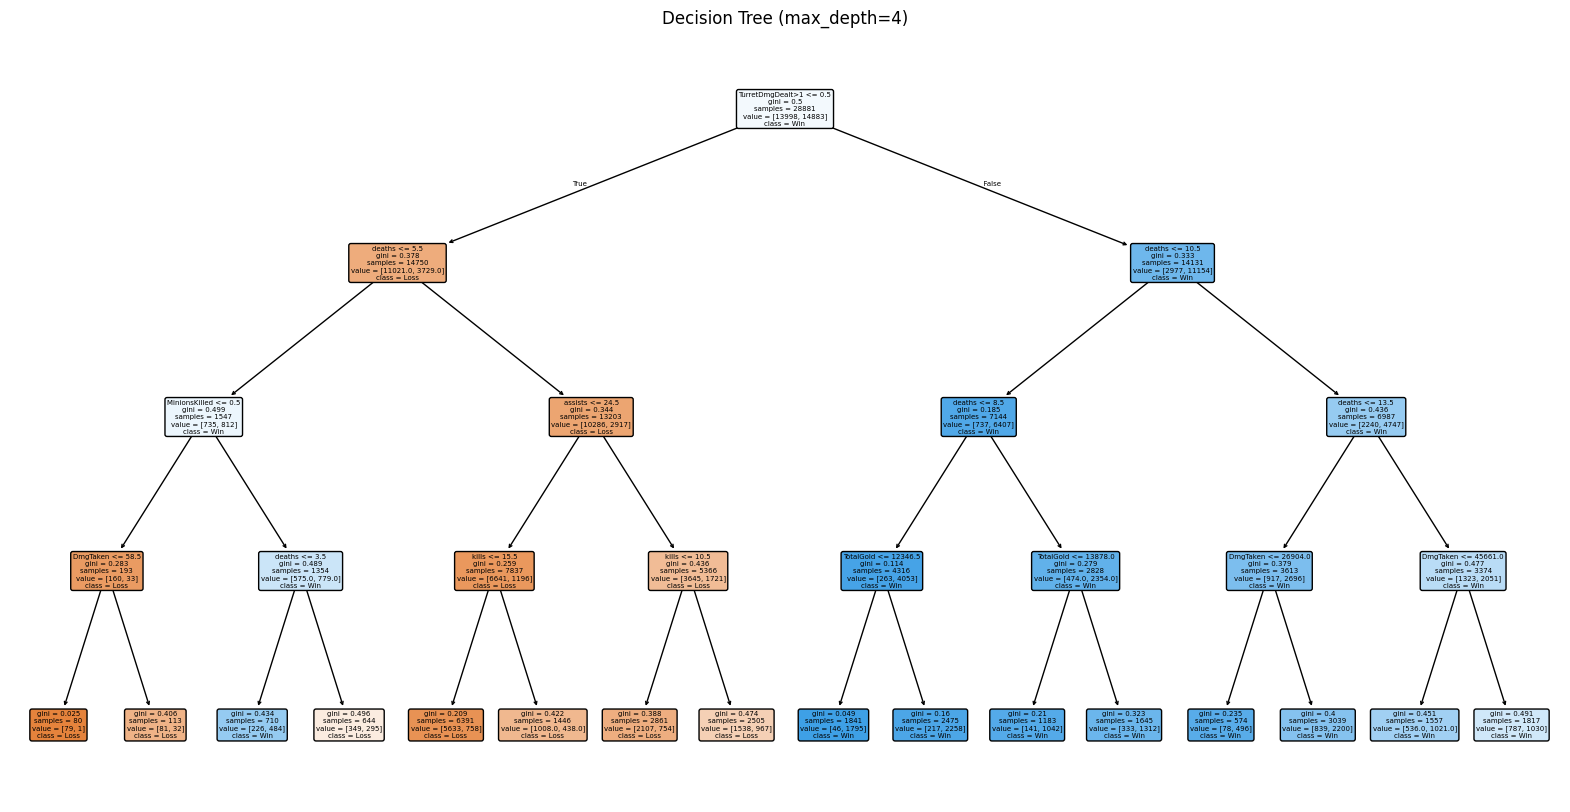

In [3]:
file_name = 'num_ARAM.csv'

df = pd.read_csv(clean_dir / file_name).set_index('#')

decision_tree(df)

Decision Tree CV ROC-AUC scores: [0.95385048 0.95151235 0.95699337 0.95465688 0.95304763]
Mean CV ROC-AUC: 0.954012140258649
Std CV ROC-AUC: 0.0018170734325481902
Decision Tree Test ROC-AUC: 0.9515892611872576

Top 10 most important features:
TotalGold        0.955101
DmgDealt         0.025448
assists          0.018638
deaths           0.000813
MinionsKilled    0.000000
DmgTaken         0.000000
kills            0.000000
dtype: float64


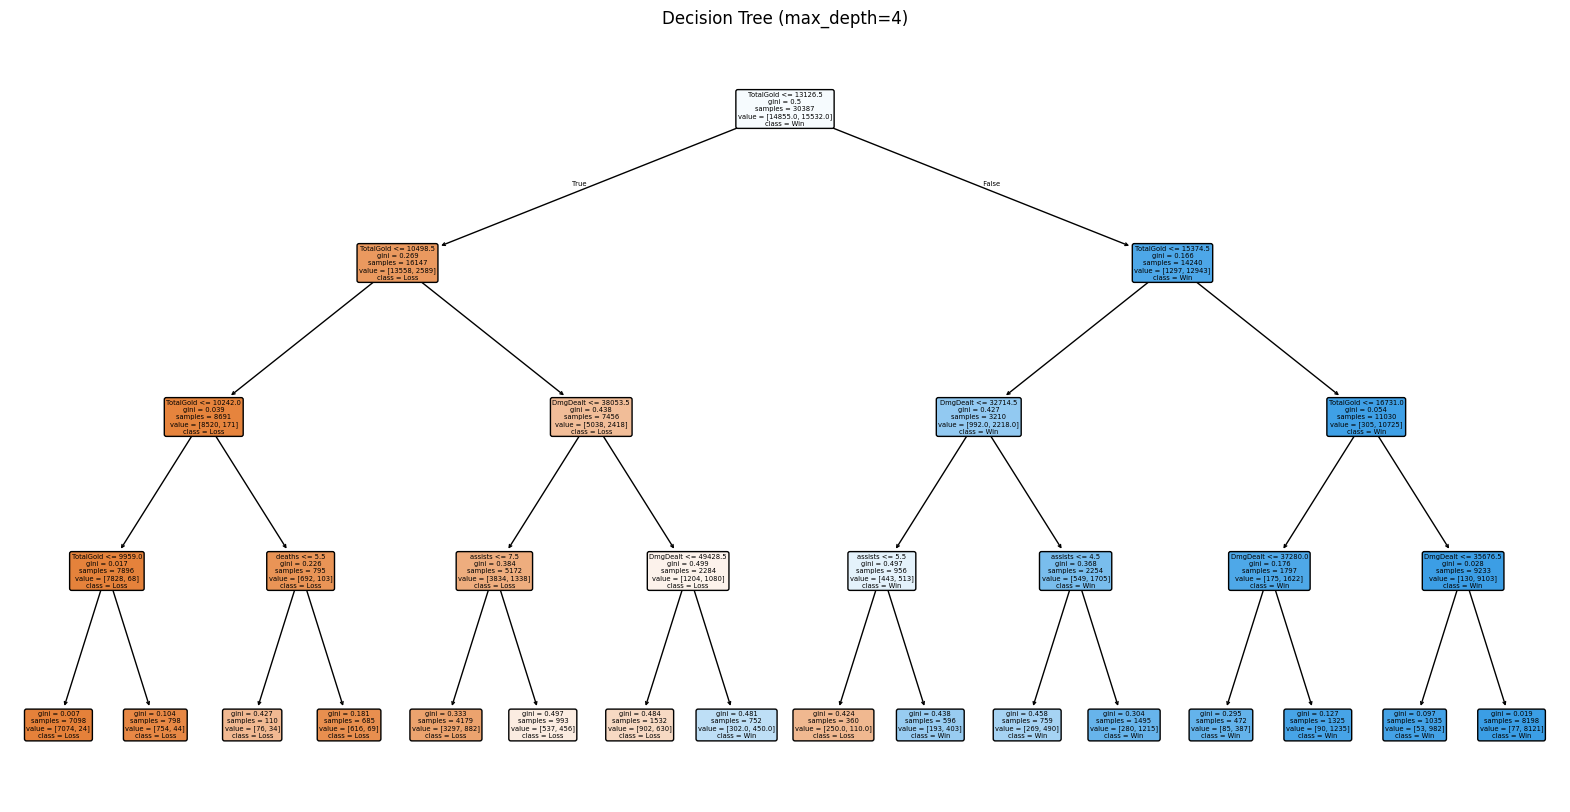

In [4]:
file_name = 'num_CHERRY.csv'

df = pd.read_csv(clean_dir / file_name).set_index('#')

decision_tree(df)

Decision Tree CV ROC-AUC scores: [0.87393117 0.87411483 0.87256924 0.8754363  0.8743982 ]
Mean CV ROC-AUC: 0.874089950052905
Std CV ROC-AUC: 0.0009215277518767928
Decision Tree Test ROC-AUC: 0.8692334209788886

Top 10 most important features:
TurretDmgDealt>3    0.514602
deaths              0.316126
assists             0.148957
kills               0.017102
MinionsKilled       0.001717
DmgTaken            0.001495
DmgDealt            0.000000
TotalGold           0.000000
DragonKills         0.000000
BaronKills          0.000000
dtype: float64


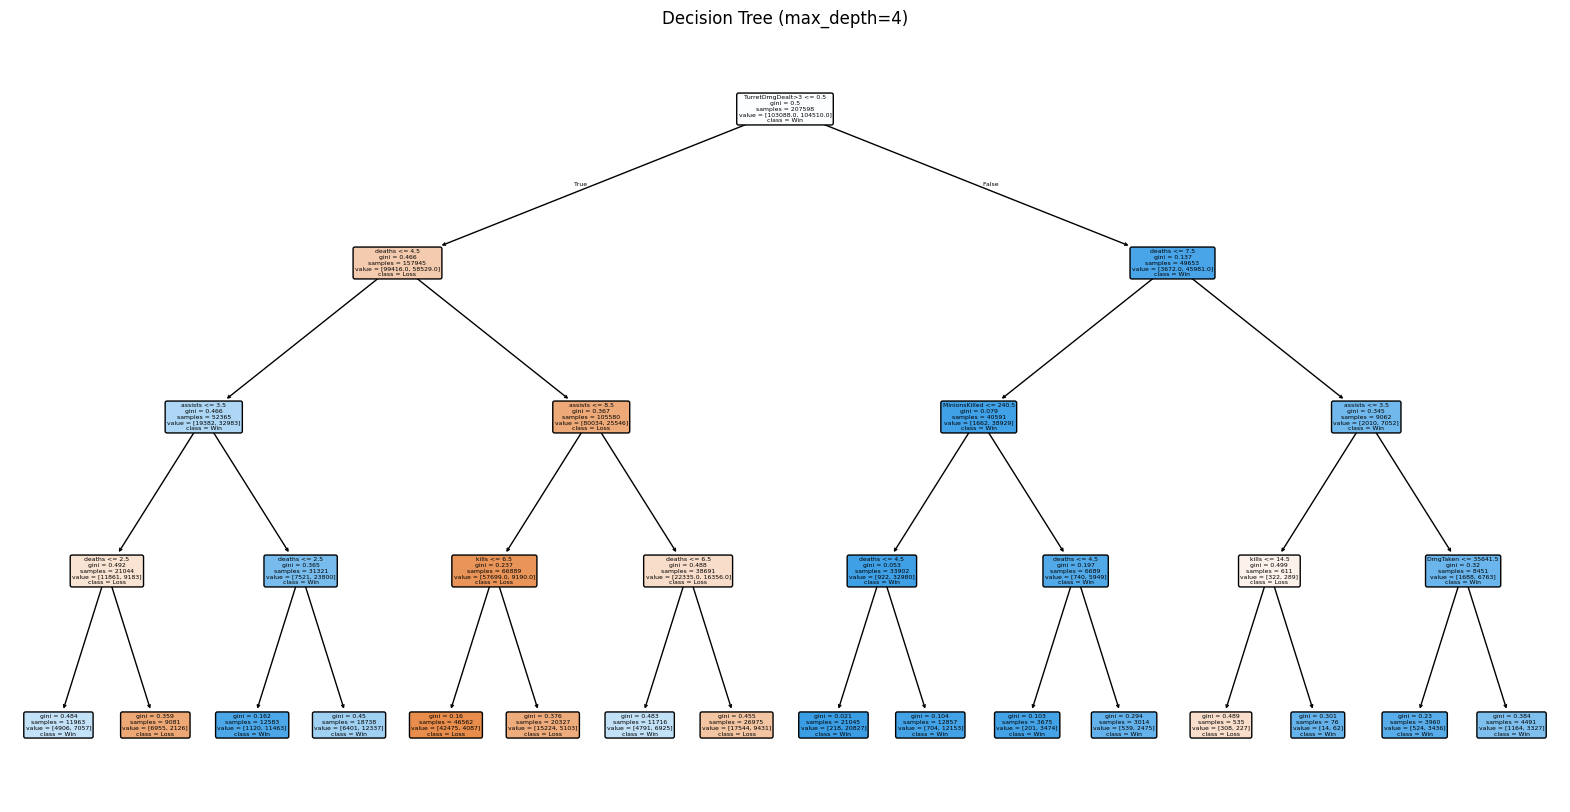

In [5]:
file_name = 'num_CLASSIC.csv'

df = pd.read_csv(clean_dir / file_name).set_index('#')

decision_tree(df)

Decision Tree CV ROC-AUC scores: [0.85223211 0.84499034 0.85461833 0.84451147 0.82627856]
Mean CV ROC-AUC: 0.8445261615136938
Std CV ROC-AUC: 0.009944085964115962
Decision Tree Test ROC-AUC: 0.7984168536524557

Top 10 most important features:
TurretDmgDealt>2    0.511848
deaths              0.227380
assists             0.120831
kills               0.075353
TotalGold           0.033186
MinionsKilled       0.016309
DmgTaken            0.008437
DmgDealt            0.006656
dtype: float64


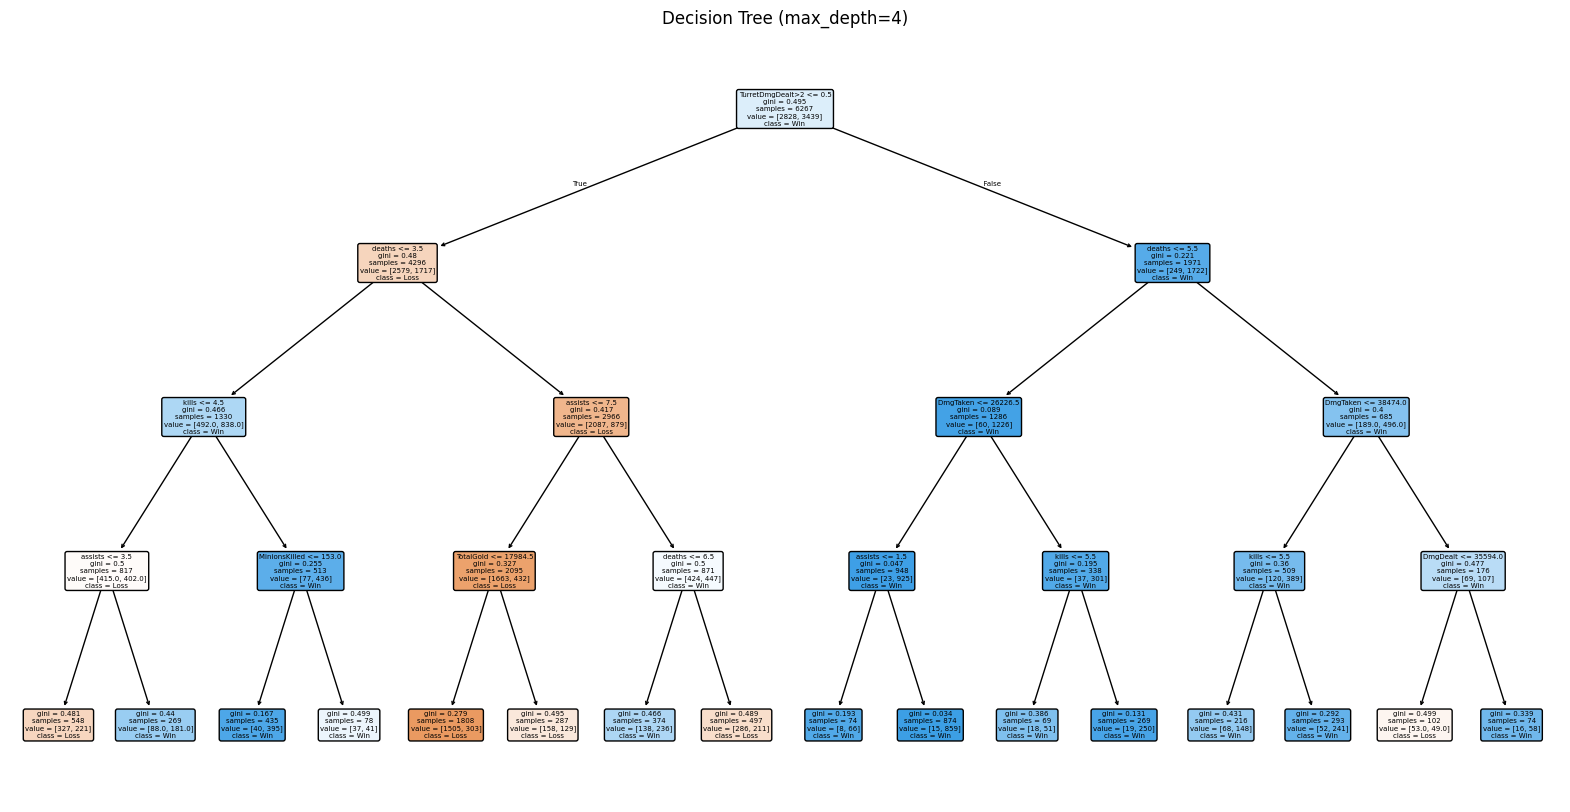

In [6]:
file_name = 'num_SWIFTPLAY.csv'

df = pd.read_csv(clean_dir / file_name).set_index('#')

decision_tree(df)

Decision Tree CV ROC-AUC scores: [0.5 0.5 0.5 0.5 0.5]
Mean CV ROC-AUC: 0.5
Std CV ROC-AUC: 0.0
Decision Tree Test ROC-AUC: 0.5

Top 10 most important features:
MinionsKilled           0.0
DmgDealt                0.0
DmgTaken                0.0
TotalGold               0.0
kills                   0.0
deaths                  0.0
assists                 0.0
CurrentMasteryPoints    0.0
DragonKills             0.0
BaronKills              0.0
dtype: float64


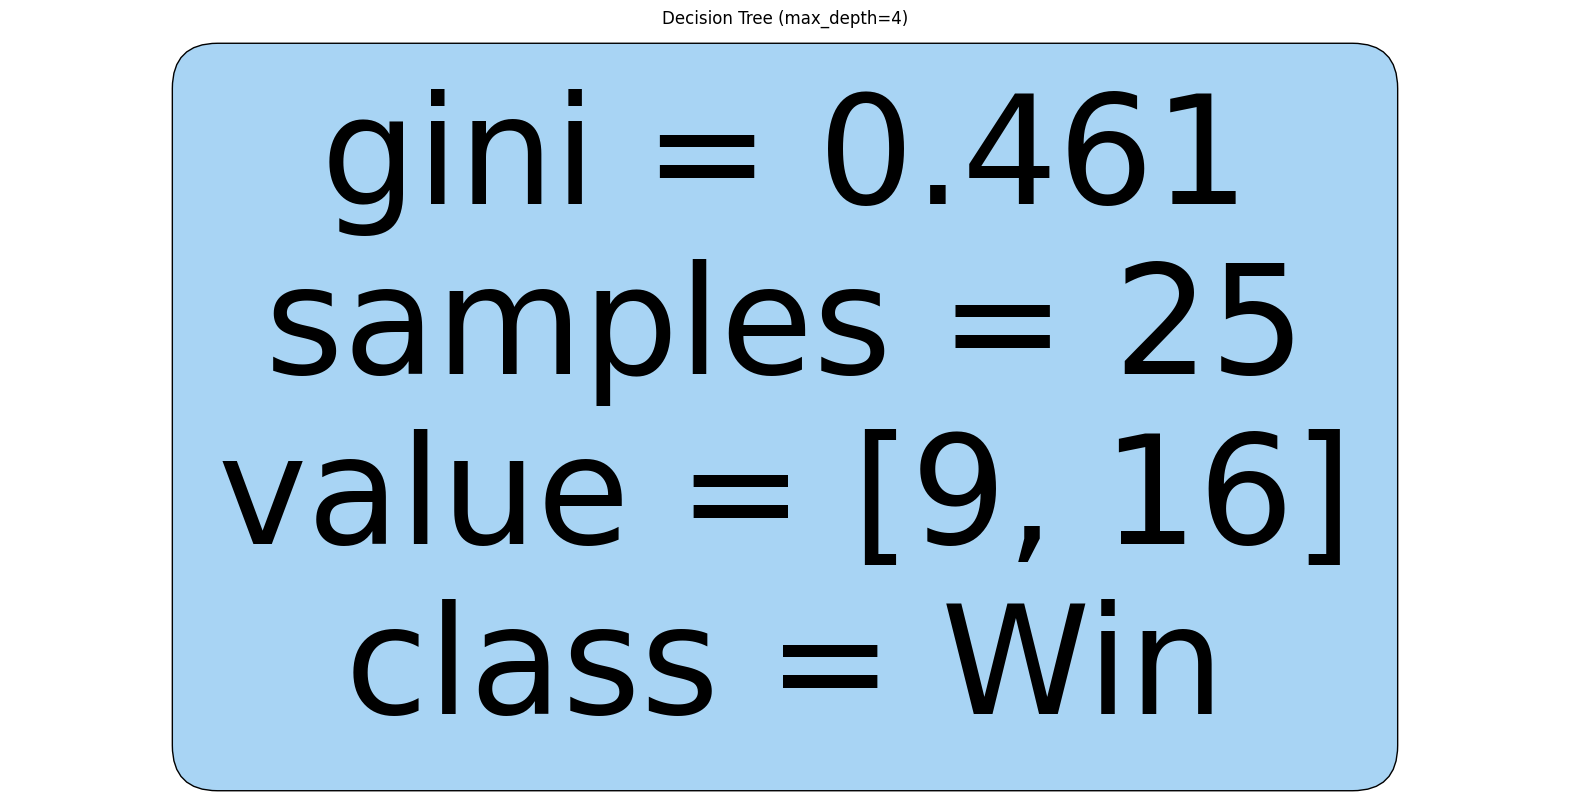

In [7]:
file_name = 'num_ULTBOOK.csv'

df = pd.read_csv(clean_dir / file_name).set_index('#')

decision_tree(df)